In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble

In [2]:
oliv = datasets.fetch_lfw_people(min_faces_per_person = 100, resize = 0.4)

In [3]:
oliv.images.shape

(1140, 50, 37)

In [4]:
oliv.data.shape

(1140, 1850)

In [5]:
x_train , x_test, y_train, y_test = train_test_split(oliv.data, oliv.target, random_state = 23)

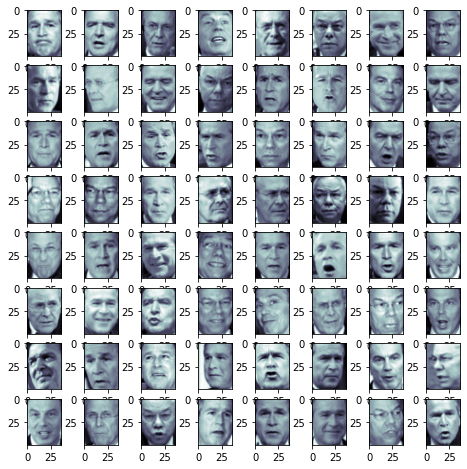

In [6]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)
plt.show()

In [7]:
pca = PCA()
pca.fit(x_train)

PCA()

In [8]:
pca.explained_variance_.shape

(855,)

In [9]:
total = pca.explained_variance_.sum()
current_var = 0
k = 0
while current_var/total < 0.99:
    current_var += pca.explained_variance_[k]
    k += 1
k

316

In [22]:
pca = PCA(n_components = k, whiten=True)
x_transformed = pca.fit_transform(x_train)

In [23]:
eignen_faces = pca.components_.reshape((-1, 50, 37))

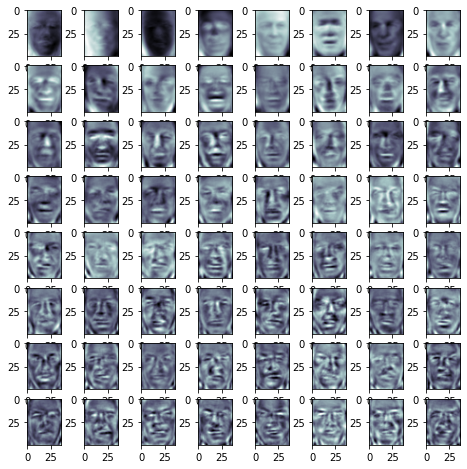

In [24]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(eignen_faces[i], cmap = plt.cm.bone)
plt.show()

In [25]:
x_train_pca = x_transformed
x_test_pca = pca.transform(x_test)

In [26]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train)
end = time.time()
print(end - start)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

2.353722095489502
              precision    recall  f1-score   support

           0       0.67      0.84      0.75        44
           1       0.91      0.30      0.45        33
           2       0.65      0.95      0.77       136
           3       1.00      0.27      0.42        30
           4       0.86      0.29      0.43        42

    accuracy                           0.69       285
   macro avg       0.82      0.53      0.57       285
weighted avg       0.75      0.69      0.65       285

[[ 37   0   7   0   0]
 [  4  10  19   0   0]
 [  7   0 129   0   0]
 [  2   1  17   8   2]
 [  5   0  25   0  12]]


In [28]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca, y_train)
end = time.time()
print(end - start)
y_pred = rf.predict(x_test_pca)
(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.1389532089233398
[[ 18   0  26   0   0]
 [  2   1  30   0   0]
 [  2   0 134   0   0]
 [  3   0  27   0   0]
 [  4   0  37   0   1]]


C:\Users\shivam.abrol\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
x_train_pca.shape, y_train.shape

((855, 316), (855,))